## SME0828 -  Introdução à Ciência de Dados
## Questionário 4: Seleção de Modelos e Regularização

### Lucas Corlete Alves de Melo  13676461


1. Considere a base BostonHousing. Compare o coeficiente $R2$ obtido através de regressão linear múltipla, Lasso e ridge regression. Para os métodos Lasso e ridge regression, faça um gráfico de $\alpha$ x $R²$ conforme feito no notebook em sala.  


2. Determine as variáveis que mais influenciam o preço de imóveis em Boston usando Lasso.  


3. Considere os dados gerados com o código a seguir. Usando regularização, ajuste o grau do polinômio que define o modelo mais adequado.  

    import numpy as np
    from matplotlib import pyplot as plt
    np.random.seed(10)

    #função para gerar os dados
    def function(x):
        y = x**4 + x**9

        return y

    #training set
    N_train = 20
    sigma = 0.2
    x_train = np.linspace(0,1,N_train)
    y_train = function(x_train) + np.random.normal(0,sigma,N_train)
    x_train = x_train.reshape(len(x_train),1)

    fig = plt.figure(figsize=(8,4))
    plt.scatter(x_train,y_train,facecolor="blue",edgecolors="b",s=100,label="training data")

    #test set
    N_test = 20
    x_test = np.linspace(0,1,N_test)
    y_test = function(x_test) + np.random.normal(0,sigma,N_test)
    x_test = x_test.reshape(len(x_test),1)

    #Curva teorica
    xt = np.linspace(0,1,100)
    yt = function(xt)
    plt.plot(xt,yt,'-r',label="Theoretical curve")
    plt.legend(fontsize=15)
    plt.show(True)

## Exercise 1

In [2]:
# Data loading

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/BostonHousing.csv', header=(0))

data = data.dropna(axis='rows') #remove NaN
# stores classes names
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  

row, col = data.shape
print("Attributes matrix: Number of rows:", row, " columns: ", col)
attributes = list(data.columns)
data.head(10)

Attributes matrix: Number of rows: 506  columns:  14


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


## Exercise 2

## Exercise 3

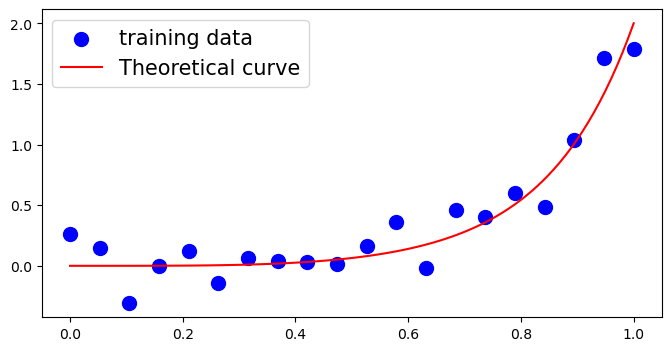

In [2]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(10)

#generating data
def function(x):
    y = x**4 + x**9
    return y

#training set
N_train = 20
sigma = 0.2
x_train = np.linspace(0,1,N_train)
y_train = function(x_train) + np.random.normal(0,sigma,N_train)
x_train = x_train.reshape(len(x_train),1)

fig = plt.figure(figsize=(8,4))
plt.scatter(x_train,y_train,facecolor="blue",edgecolors="b",s=100,label="training data")

#test set
N_test = 20
x_test = np.linspace(0,1,N_test)
y_test = function(x_test) + np.random.normal(0,sigma,N_test)
x_test = x_test.reshape(len(x_test),1)

#Theoretical curve
xt = np.linspace(0,1,100)
yt = function(xt)
plt.plot(xt,yt,'-r',label="Theoretical curve")
plt.legend(fontsize=15)
plt.show(True)

Os dados que temos acesso são os pontos em azul. A curva em vermelho é desconhecida, representando o modelo gerador dos dados.  
Vamos fazer o ajuste usando um polinômio de grau M. 

$$
f(x,\theta)=\theta_0+\theta_1x
$$